Objective

The objective of the project is to perform EDA to understand the relationships between various features, such as education, experience, skills, test scores,demography and their impact on salary.

In [609]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [610]:
# load dataset
df = pd.read_excel('AMCAT_data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [611]:
df.shape

(3998, 39)

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [613]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


Data Cleaning

In [614]:
# drop the column Unnamed: 0
df = df.drop('Unnamed: 0',axis = 1)

In [615]:
#Fix column names
#Convert all column names to sentencecase
df.columns = df.columns.str.capitalize()

In [616]:
df.columns

Index(['Id', 'Salary', 'Doj', 'Dol', 'Designation', 'Jobcity', 'Gender', 'Dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'Collegeid', 'Collegetier', 'Degree', 'Specialization', 'Collegegpa',
       'Collegecityid', 'Collegecitytier', 'Collegestate', 'Graduationyear',
       'English', 'Logical', 'Quant', 'Domain', 'Computerprogramming',
       'Electronicsandsemicon', 'Computerscience', 'Mechanicalengg',
       'Electricalengg', 'Telecomengg', 'Civilengg', 'Conscientiousness',
       'Agreeableness', 'Extraversion', 'Nueroticism',
       'Openess_to_experience'],
      dtype='object')

In [617]:
#Rename column name to Neuroticism
df.rename(columns = {'Nueroticism':'Neuroticism'},inplace = True)

In [618]:
# Convert date related columns to datetime type
date_columns = ['12graduation', 'Graduationyear']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

Data Analysis

Univariate Analysis - Statistical Non Visual Analysis

In [619]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [620]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

Discrete univariate analysis

In [621]:
discrete_univariate_analysis(discrete_df)

********** Dol **********
count                                                   3998
nunique                                                   67
unique     [present, 2015-03-01 00:00:00, 2015-05-01 00:0...
Name: Dol, dtype: object
Value Counts: 
 present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: Dol, Length: 67, dtype: int64

********** Designation **********
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 software engineer                    539
software developer                   265
system engineer                      205
programmer analy

Numerical univariate analysis

In [622]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [623]:
numerical_univariate_analysis(numerical_df)

********** Id **********
min       1.124400e+04
max       1.298275e+06
mean      6.637945e+05
median    6.396000e+05
std       3.632182e+05
Name: Id, dtype: float64

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

********** 10percentage **********
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64

********** 12percentage **********
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64

********** Collegeid **********
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        4802.261482
Name: Collegeid, dtype: float64

********** Collegetier **********
min       1.000000
max       2.000000
mean      1.925713
median    2.000000
std       0.262270
Name: Col

Univariate - Visual Analysis

Gender Distribution

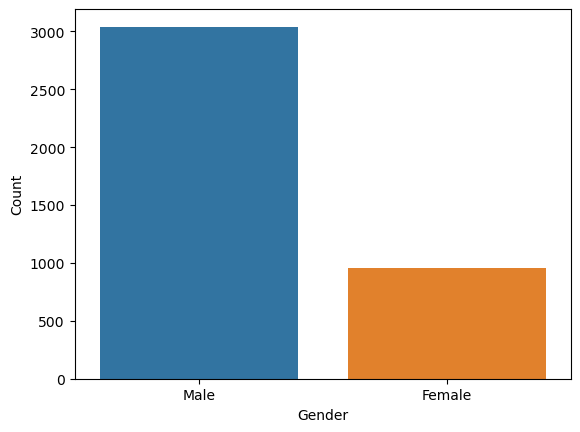

In [624]:
df['Gender'] = df['Gender'].map({'m': 'Male', 'f': 'Female'})
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Class 10 board distribution 

In [625]:
XBoard={'board ofsecondary education,ap':'STATE', 'cbse':'CBSE', 'state board':'STATE',
       'mp board bhopal':'STATE', 'icse':'ICSE',
       'karnataka secondary school of examination':'STATE', 'up':'STATE',
       'karnataka state education examination board':'STATE', 'ssc':'STATE',
       'kerala state technical education':'STATE', 0:'Other', 'bseb':'STATE',
       'state board of secondary education, andhra pradesh':'STATE',
       'matriculation':'Other', 'gujarat state board':'STATE', 'karnataka state board':'STATE',
       'wbbse':'STATE', 'maharashtra state board':'STATE', 'icse board':'ICSE', 'up board':'STATE',
       'board of secondary education(bse) orissa':'STATE',
       'little jacky matric higher secondary school':'Other',
       'uttar pradesh board':'STATE', 'bsc,orissa':'STATE', 'mp board':'STATE', 'upboard':'STATE',
       'matriculation board':'Other', 'j & k bord':'STATE', 'rbse':'STATE',
       'central board of secondary education':'CBSE', 'pseb':'STATE', 'jkbose':'STATE',
       'haryana board of school education,(hbse)':'STATE', 'metric':'Other', 'ms board':'STATE',
       'kseeb':'STATE', 'stateboard':'STATE', 'maticulation':'Other',
       'karnataka secondory education board':'STATE', 'mumbai board':'STATE', 'sslc':'STATE',
       'kseb':'STATE', 'board secondary  education':'STATE', 'matric board':'Other',
       'board of secondary education':'STATE',
       'west bengal board of secondary education':'STATE',
       'jharkhand secondary examination board,ranchi':'STATE', 'u p board':'STATE',
       'bseb,patna':'STATE', 'hsc':'STATE', 'bse':'STATE', 'sss pune':'STATE',
       'karnataka education board (keeb)':'STATE', 'kerala':'STATE',
       'state board of secondary education( ssc)':'STATE', 'gsheb':'STATE',
       'up(allahabad)':'STATE', 'nagpur':'STATE', 'don bosco maatriculation school':'ICSE',
       'karnataka state secondary education board':'STATE', 'maharashtra':'STATE',
       'karnataka secondary education board':'STATE',
       'himachal pradesh board of school education':'STATE',
       'certificate of middle years program of ib':'Other',
       'karnataka board of secondary education':'STATE',
       'board of secondary education rajasthan':'STATE', 'uttarakhand board':'STATE',
       'ua':'STATE', 'board of secendary education orissa':'STATE',
       'karantaka secondary education and examination borad':'STATE', 'hbsc':'STATE',
       'kseeb(karnataka secondary education examination board)':'STATE',
       'cbse[gulf zone]':'CBSE', 'hbse':'STATE', 'state(karnataka board)':'STATE',
       'jharkhand accademic council':'STATE',
       'jharkhand secondary examination board (ranchi)':'STATE',
       'karnataka secondary education examination board':'STATE', 'delhi board':'STATE',
       'mirza ahmed ali baig':'STATE', 'jseb':'STATE', 'bse, odisha':'STATE', 'bihar board':'STATE',
       'maharashtra state(latur board)':'STATE', 'rajasthan board':'STATE', 'mpboard':'STATE',
       'upbhsie':'STATE', 'secondary board of rajasthan':'STATE',
       'tamilnadu matriculation board':'Other', 'jharkhand secondary board':'STATE',
       'board of secondary education,andhara pradesh':'STATE', 'up baord':'STATE',
       'state':'STATE', 'board of intermediate education':'Other',
       'state board of secondary education,andhra pradesh':'STATE',
       'up board , allahabad':'STATE',
       'stjosephs girls higher sec school,dindigul':'Other', 'maharashtra board':'STATE',
       'education board of kerala':'STATE', 'board of ssc':'STATE',
       'maharashtra state board pune':'STATE',
       'board of school education harayana':'STATE',
       'secondary school cerfificate':'STATE', 'maharashtra sate board':'STATE', 'ksseb':'STATE',
       'bihar examination board, patna':'STATE', 'latur':'STATE',
       'board of secondary education, rajasthan':'STATE', 'state borad hp':'STATE',
       'cluny':'CBSE', 'bsepatna':'STATE', 'up borad':'STATE', 'ssc board of andrapradesh':'STATE',
       'matric':'Other', 'bse,orissa':'STATE', 'ssc-andhra pradesh':'STATE', 'mp':'STATE',
       'karnataka education board':'STATE', 'mhsbse':'STATE',
       'karnataka sslc board bangalore':'STATE', 'karnataka':'STATE', 'u p':'STATE',
       'secondary school of education':'STATE', 'state board of karnataka':'STATE',
       'karnataka secondary board':'STATE', 'andhra pradesh board ssc':'STATE',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'CBSE',
       'hse,orissa':'STATE', 'national public school':'ICSE', 'nagpur board':'STATE',
       'jharkhand academic council':'STATE', 'bsemp':'STATE',
       'board of secondary education, andhra pradesh':'STATE',
       'board of secondary education orissa':'STATE',
       'board of secondary education,rajasthan(rbse)':'STATE',
       'board of secondary education,ap':'STATE',
       'board of secondary education,andhra pradesh':'STATE',
       'jawahar navodaya vidyalaya':'CBSE', 'aisse':'CBSE',
       'karnataka board of higher education':'STATE', 'bihar':'STATE',
       'kerala state board':'STATE', 'cicse':'ICSE', 'tn state board':'STATE',
       'kolhapur divisional board, maharashtra':'STATE',
       'bharathi matriculation school':'Other', 'uttaranchal state board':'STATE',
       'wbbsce':'STATE', 'mp state board':'STATE', 'seba(assam)':'STATE', 'anglo indian':'Other', 'gseb':'STATE',
       'uttar pradesh':'STATE', 'ghseb':'STATE', 'board of school education uttarakhand':'STATE',
       'msbshse,pune':'STATE', 'tamilnadu state board':'STATE', 'kerala university':'STATE',
       'uttaranchal shiksha avam pariksha parishad':'STATE',
       'bse(board of secondary education)':'STATE',
       'bright way college, (up board)':'STATE',
       'school secondary education, andhra pradesh':'STATE',
       'secondary state certificate':'STATE',
       'maharashtra state board of secondary and higher secondary education,pune':'STATE',
       'andhra pradesh state board':'STATE', 'stmary higher secondary':'CBSE', 'cgbse':'STATE',
       'secondary school certificate':'STATE', 'rajasthan board ajmer':'STATE', 'mpbse':'STATE',
       'pune board':'STATE', 'cbse ':'CBSE', 'board of secondary education,orissa':'STATE',
       'maharashtra state board,pune':'STATE', 'up bord':'STATE',
       'kiran english medium high school':'Other', 'state board (jac, ranchi)':'STATE',
       'gujarat board':'STATE', 'state board ':'STATE', 'sarada high scchool':'Other',
       'kalaimagal matriculation higher secondary school':'Other',
       'karnataka board':'STATE', 'maharastra board':'STATE', 'sslc board':'STATE',
       'ssc maharashtra board':'STATE', 'tamil nadu state':'STATE', 'uttrakhand board':'STATE',
       'bihar secondary education board,patna':'STATE',
       'haryana board of school education':'STATE',
       'sri kannika parameswari highier secondary school, udumalpet':'STATE',
       'ksseb(karnataka state board)':'STATE', 'nashik board':'STATE',
       'jharkhand secondary education board':'STATE', 'himachal pradesh board':'STATE',
       'maharashtra satate board':'STATE',
       'maharashtra state board mumbai divisional board':'STATE',
       'dav public school,hehal':'CBSE',
       'state board of secondary education, ap':'STATE',
       'rajasthan board of secondary education':'STATE', 'hsce':'STATE',
       'karnataka secondary education':'STATE',
       'board of secondary education,odisha':'STATE', 'maharashtra nasik board':'STATE',
       'west bengal board of secondary examination (wbbse)':'STATE',
       'holy cross matriculation hr sec school':'Other', 'cbsc':'CBSE', 'apssc':'STATE',
       'bseb patna':'STATE', 'kolhapur':'STATE', 'bseb, patna':'STATE', 'up board allahabad':'STATE',
       'biharboard':'STATE', 'nagpur board,nagpur':'STATE', 'pune':'STATE', 'gyan bharati school':'CBSE',
       'rbse,ajmer':'STATE', 'board of secondaray education':'STATE',
       'secondary school education':'STATE', 'state bord':'STATE', 'jbse,jharkhand':'STATE',
       'hse':'STATE', 'madhya pradesh board':'STATE', 'bihar school examination board':'STATE',
       'west bengal board of secondary eucation':'STATE', 'state boardmp board ':'STATE',
       'icse board , new delhi':'ICSE',
       'board of secondary education (bse) orissa':'STATE',
       'maharashtra state board for ssc':'STATE',
       'board of secondary school education':'STATE', 'latur board':'STATE',
       "stmary's convent inter college":'CBSE', 'nagpur divisional board':'STATE',
       'ap state board':'STATE', 'cgbse raipur':'STATE', 'uttranchal board':'STATE', 'ksbe':'STATE',
       'central board of secondary education, new delhi':'CBSE',
       'bihar school examination board patna':'CBSE', 'cbse board':'CBSE',
       'sslc,karnataka':'STATE', 'mp-bse':'STATE', 'up bourd':'STATE', 'dav public school sec 14':'CBSE',
       'board of school education haryana':'STATE',
       'council for indian school certificate examination':'Other',
       'aurangabad board':'STATE', 'j&k state board of school education':'STATE',
       'maharashtra state board of secondary and higher secondary education':'STATE',
       'maharashtra state boar of secondary and higher secondary education':'STATE',
       'ssc regular':'STATE', 'karnataka state examination board':'STATE', 'nasik':'STATE',
       'west bengal  board of secondary education':'STATE', 'up board,allahabad':'STATE',
       'bseb ,patna':'STATE',
       'state board - west bengal board of secondary education : wbbse':'STATE',
       'maharashtra state board of secondary & higher secondary education':'STATE',
       'delhi public school':'CBSE', 'karnataka secondary eduction':'STATE',
       'secondary education board of rajasthan':'STATE',
       'maharashtra board, pune':'STATE', 'rbse (state board)':'STATE', 'apsche':'STATE',
       'board of  secondary education':'STATE',
       'board of high school and intermediate education uttarpradesh':'STATE',
       'kea':'STATE', 'board of secondary education - andhra pradesh':'STATE',
       'ap state board for secondary education':'STATE', 'seba':'STATE',
       'punjab school education board, mohali':'STATE',
       'jharkhand acedemic council':'STATE', 'hse,board':'STATE',
       'board of ssc education andhra pradesh':'STATE', 'up-board':'STATE', 'bse,odisha':'STATE'}

In [626]:
df['10board'].replace(XBoard,inplace=True)

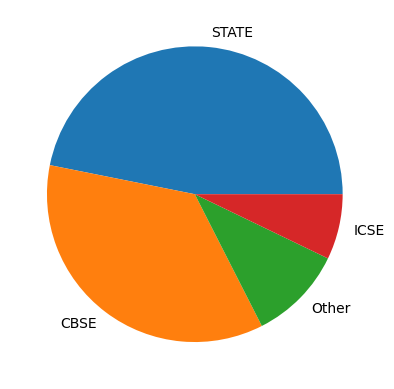

In [627]:
xboard_df=pd.DataFrame(df['10board'].value_counts())
plt.pie(xboard_df['10board'],labels=xboard_df.index)
plt.show()

Most of the students are from State and CBSE board in class 10.

Marks distribution

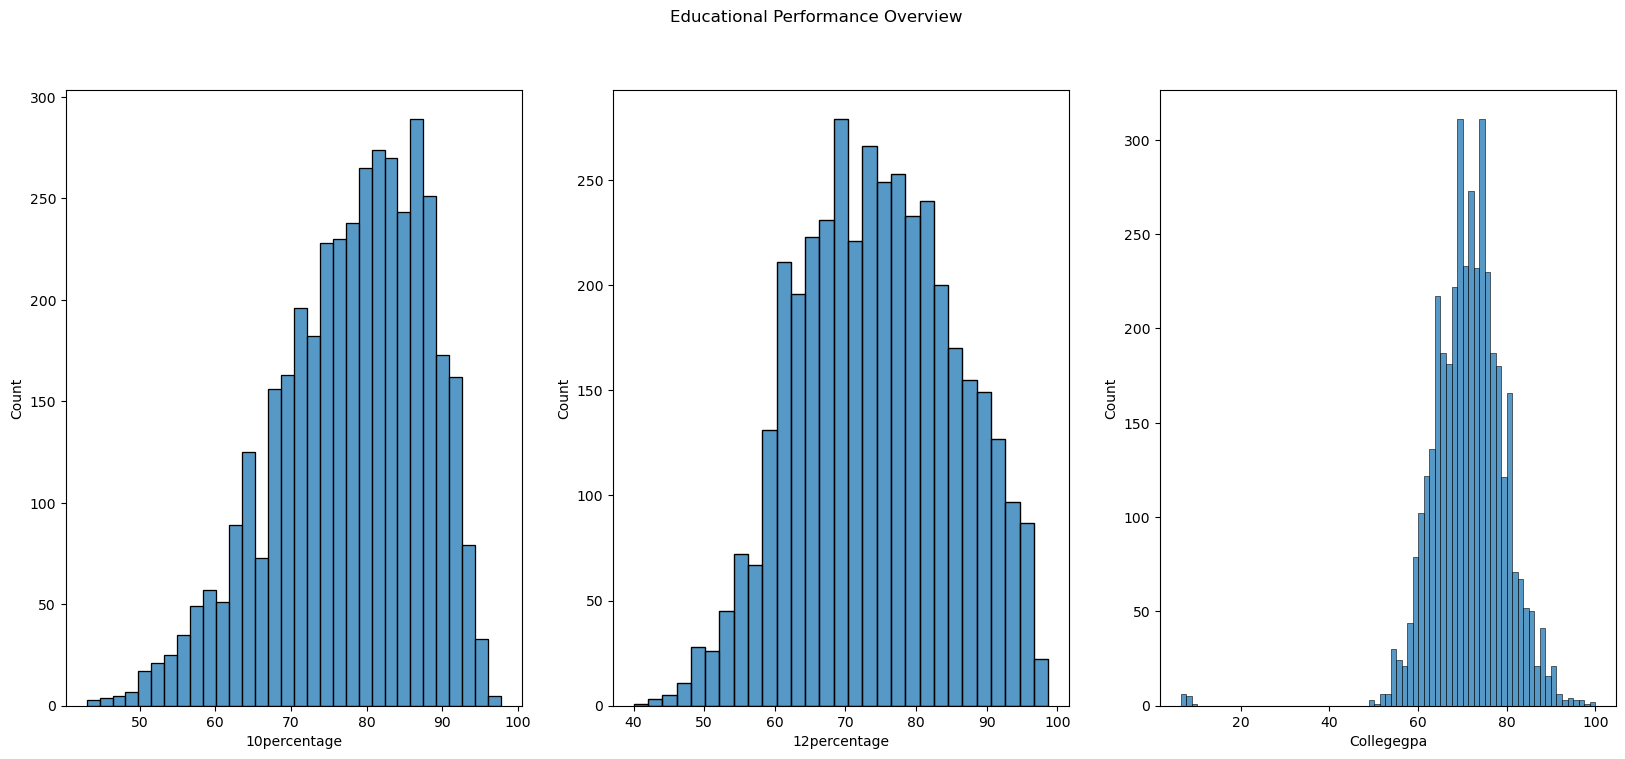

In [628]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
 
fig.suptitle('Educational Performance Overview')

sns.histplot(ax=axes[0],x=df['10percentage'])
sns.histplot(ax=axes[1],x=df['12percentage'])
sns.histplot(ax=axes[2],x=df['Collegegpa'])
plt.show()

Most of the aspirants got 50 to 100 percentages in 10th, 12th and College but there are some students who failed in class 10 and college.

Personality Test Scores Distribution

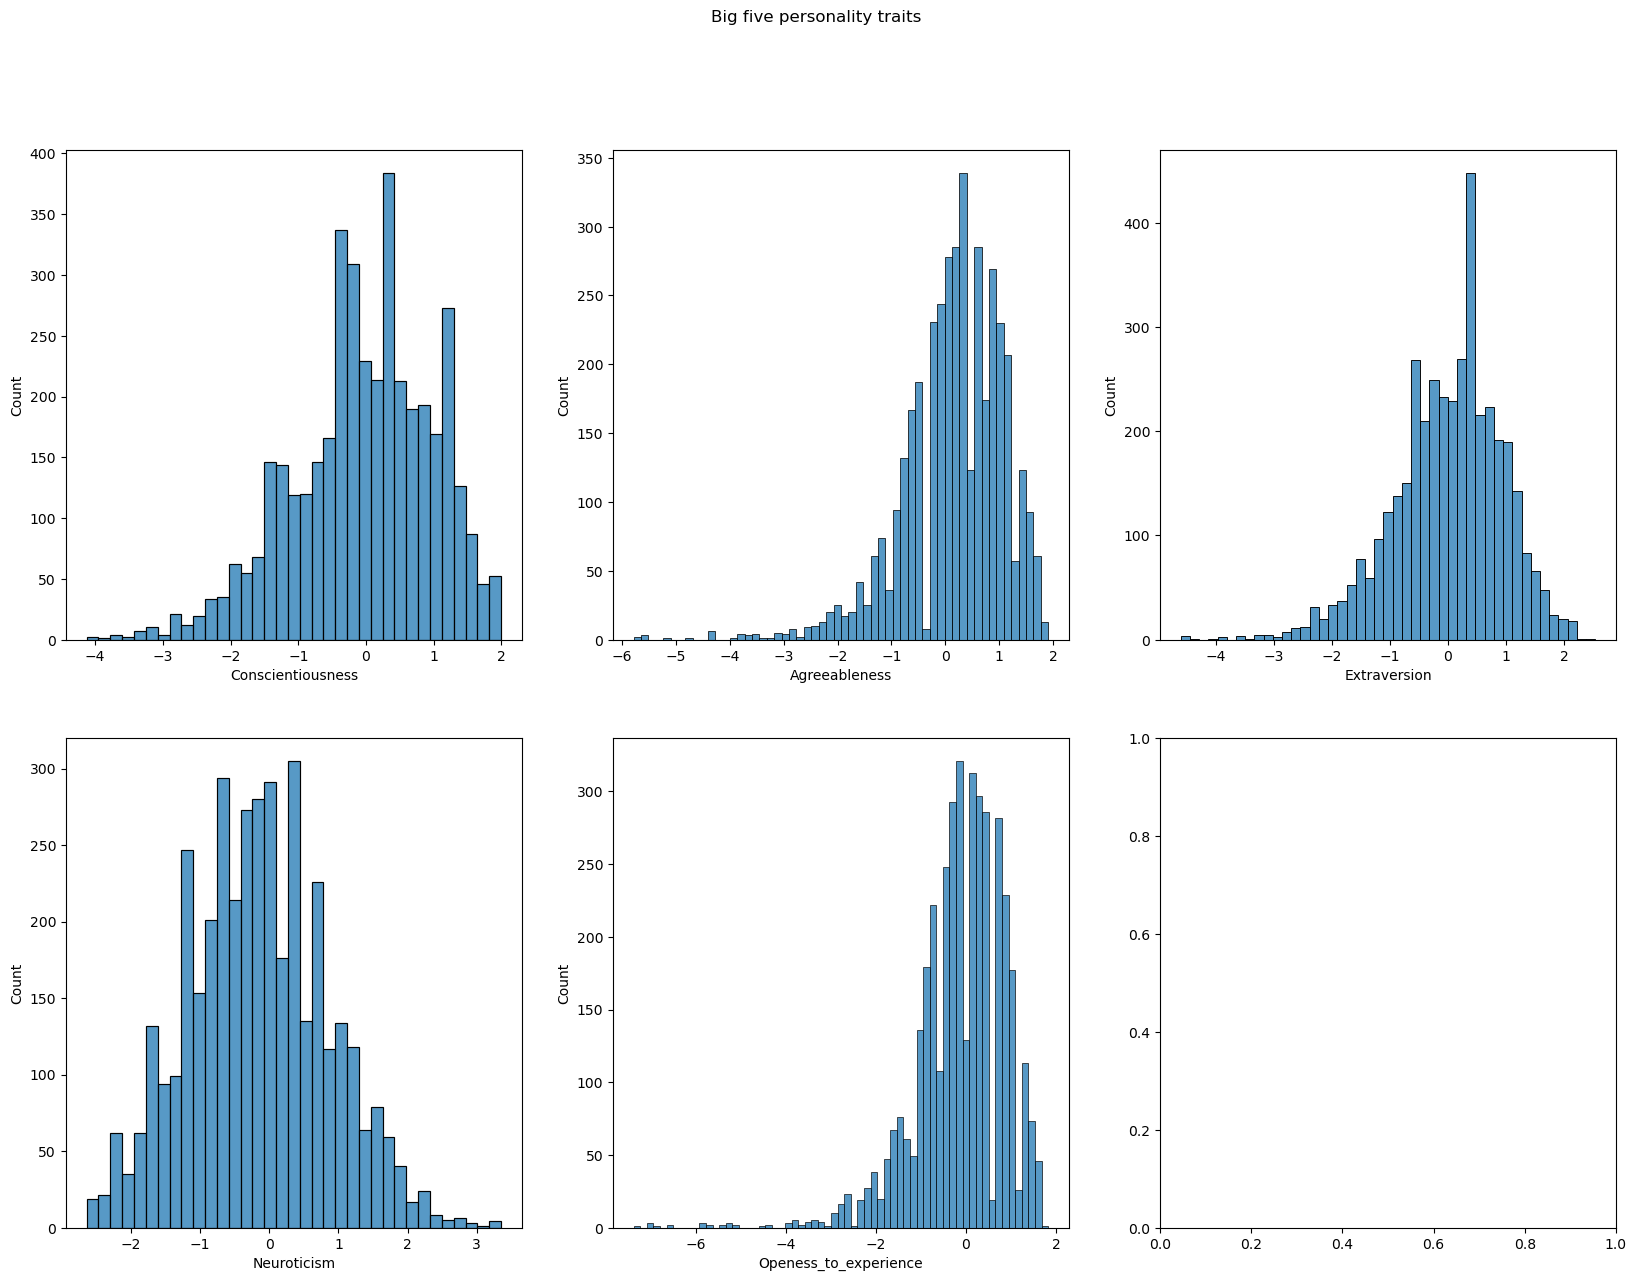

In [629]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
 
fig.suptitle('Big five personality traits')

sns.histplot(ax=axes[0, 0], x=df['Conscientiousness'])
sns.histplot(ax=axes[0, 1], x=df['Agreeableness'])
sns.histplot(ax=axes[0, 2], x=df['Extraversion'])
sns.histplot(ax=axes[1, 0], x=df['Neuroticism'])  
sns.histplot(ax=axes[1, 1], x=df['Openess_to_experience'])
plt.show()

The personality test scores are mostly left skewed 
which means that most people score higher on these traits, 
with a smaller number of individuals showing lower scores.

Neuroticism scores follow normal distribution 
which means that most individuals have an average level of neuroticism, 
with only a smaller proportion showing very high or very low neuroticism traits.

College Tier Distribution

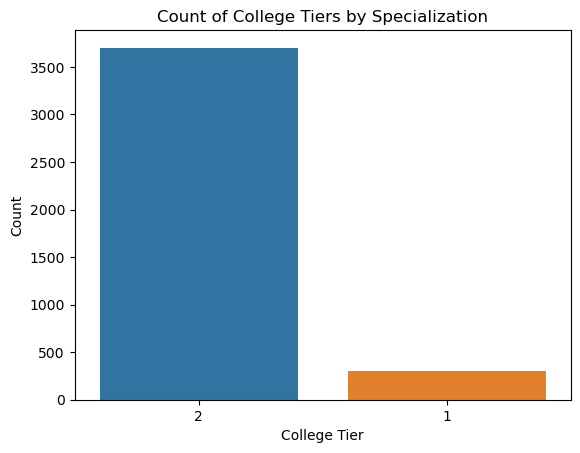

In [630]:
sns.countplot(data=df, x=df['Collegetier'].astype(str))

plt.title('Count of College Tiers by Specialization')
plt.xlabel('College Tier')
plt.ylabel('Count')
#plt.legend(title='Specialization')
plt.show()

Tier 2 has more colleges.

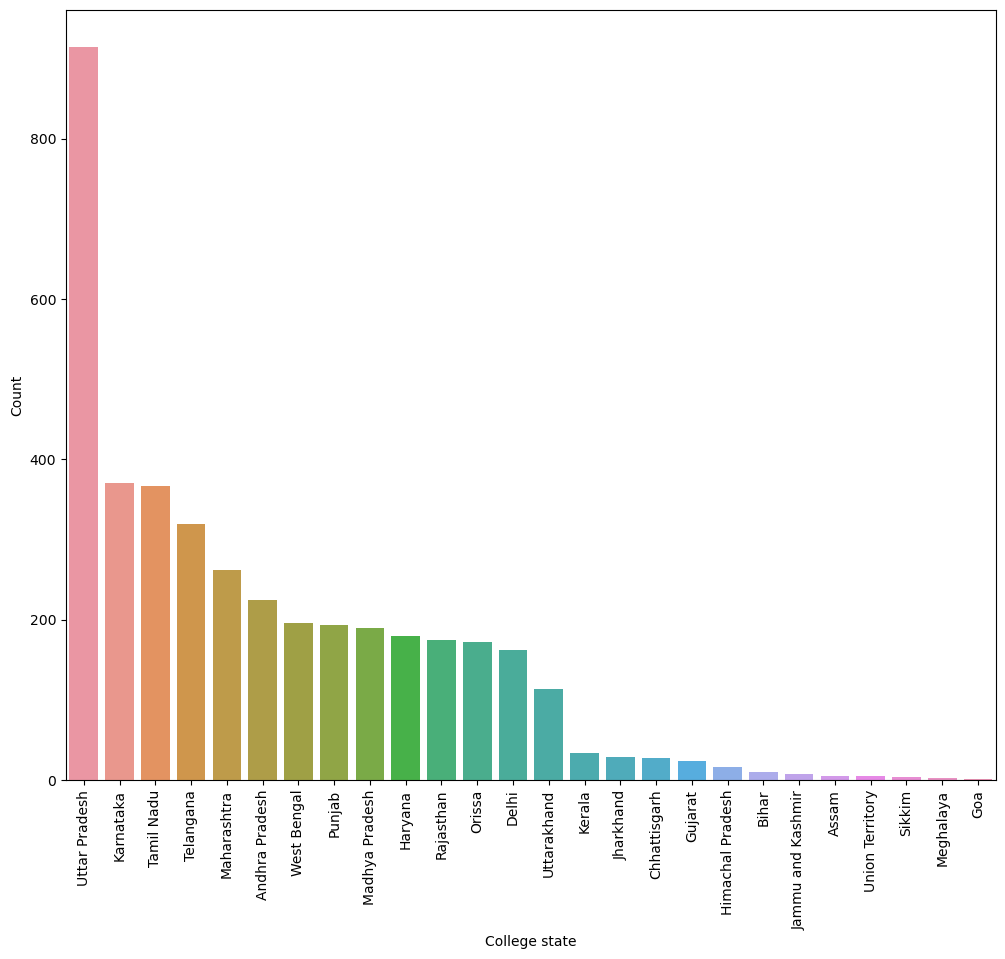

In [631]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Collegestate'].value_counts().index, y=df['Collegestate'].value_counts().values)
plt.xlabel('College state')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Specialization Distribution

In [632]:
Domains={'computer engineering':'CS','electronics and communication engineering':'EE',
 'information technology':'IT','computer science & engineering':'CS',
 'mechanical engineering':'ME','electronics and electrical engineering':'EE',
 'electronics & telecommunications':'EE','instrumentation and control engineering':'EE','computer application':'CS',
 'electronics and computer engineering':'EE','electrical engineering':'EE',
 'applied electronics and instrumentation':'EE','electronics & instrumentation eng':'EE','information science engineering':'IT',
 'civil engineering':'CE','mechanical and automation':'ME','industrial & production engineering':'Other',
 'control and instrumentation engineering':'EE','metallurgical engineering':'Other',
 'electronics and instrumentation engineering':'EE', 'electronics engineering':'EE',
 'ceramic engineering':'Other','chemical engineering': 'Chem', 'aeronautical engineering':'AE',
 'other':'Other','biotechnology':'Other', 'embedded systems technology':'EE',
 'electrical and power engineering':'EE', 'computer science and technology':'CS',
 'mechatronics':'ME','automobile/automotive engineering':'ME', 'polymer technology':'Other',
 'mechanical & production engineering':'ME', 'power systems and automation':'EE',
 'instrumentation engineering':'EE' ,'telecommunication engineering':'IT',
 'industrial & management engineering':'ME', 'industrial engineering':'ME',
 'computer and communication engineering':'CS',
 'information & communication technology':'IT', 'information science':'CS',
 'internal combustion engine':'Other', 'computer networking':'CS',
 'biomedical engineering':'Other', 'electronics':'EE', 'computer science':'CS'}

In [633]:
df['Specialization'].replace(Domains,inplace=True)

In [634]:
Domain_replace = {'Chem':'Other','AE':'Other'}
df['Specialization'].replace(Domain_replace,inplace=True)


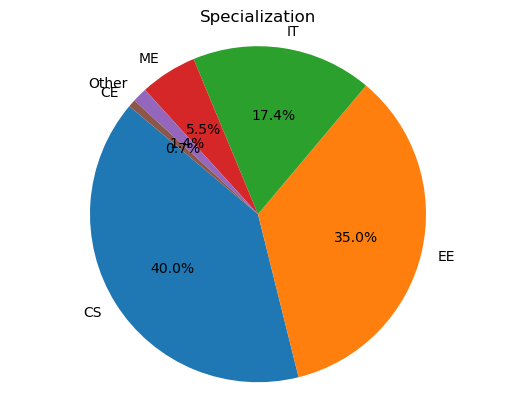

In [635]:
# Count the categories
counts = df['Specialization'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Specialization')
plt.axis('equal')  
plt.show()

Designation Distribution

In [636]:
popular_role = list(pd.DataFrame(df['Designation'].value_counts()).head(15).index)

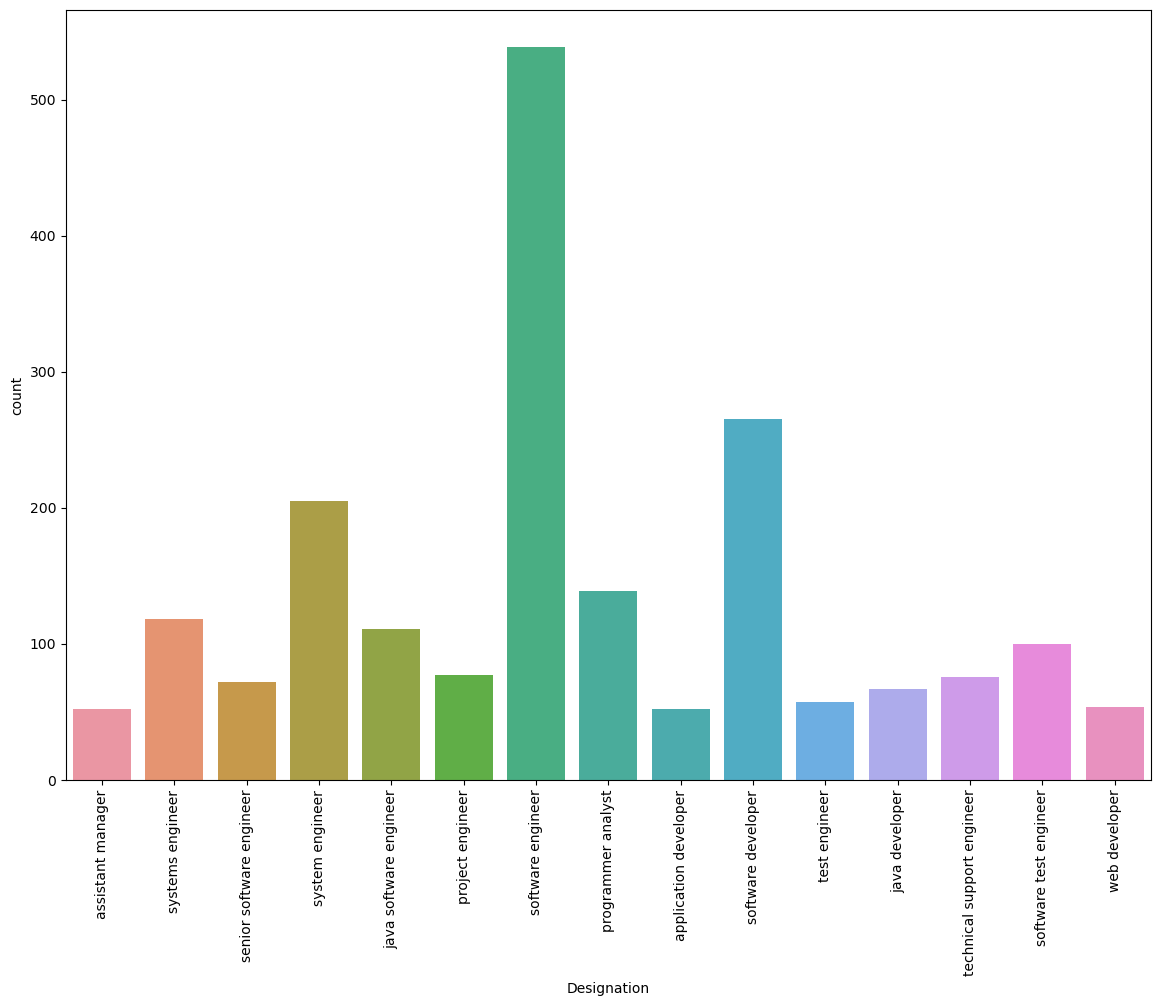

In [637]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'])
plt.xticks(rotation=90)
plt.show()

Job city Distribution

In [638]:
len(list(df['Jobcity'].unique()))

339

In [639]:
choice=['AM','Agra','Ahmedabad','Ahmednagar','Saudi Arabia','Allahabad','Alwar','Ambala','Asansol','Aurangabad','Australia','Angul','Ariyalur',
 'Bhopal','Baddi HP','Bahadurgarh','Bangalore','Bankura','Bareli','Baripada','Baroda','Bathinda','Beawar','Belgium',
 'Bellary','Bhagalpur','Bharuch','Bhilai','Bihar','Bhiwadi','Bhubaneshwar','Bikaner','Bilaspur','Bulandshahar','Bundi','Burdwan',
 'CHEYYAR','Calicut','Chandigarh','Chandrapur','Chennai','Chennai & Mumbai','Chennai, Bangalore','Coimbatore',
 'Daman and Diu','Dammam','Dausa','Dehradun','Delhi','Dhanbad','Dharamshala','Dharmapuri','Dharuhera','Dubai','Durgapur',
'Ernakulam','Faridabad','Gagret','Gandhi Nagar','Ganjam','Ghaziabad','Gonda','Gorakhpur','Greater Noida','Gulbarga',
 'Gurga', 'Gurgaon','Guwahati','Gwalior','Haldia','Haridwar','Hissar','Hospete','Howrah','Hubli','Hyderabad','Haryana',
 'Indirapuram, Ghaziabad','Indore','Jabalpur','Jagdalpur','Jaipur','Jalandhar','Jammu','Jamnagar','Jamshedpur','Jaspur','Jeddah Saudi Arabia',
 'Jhajjar','Jhansi','Jodhpur','Johannesburg','Joshimath','Jowai','Kakinada','Kalmar, Sweden','Kalamb','Kanpur','Karad','Karnal','Khopoli','kharagpur',
 'Kolhapur','kudankulam ,tarapur','Latur (Maharashtra )','Kochi','Kochi/Cochin, Chennai and Coimbatore','Kolkata','Kota','Kurnool','Kerala','London','Lucknow','Ludhiana','Madurai','Maharajganj','Mainpuri','Manesar',
 'Mangalore','Meerut','Mettur, Tamil Nadu ','Miryalaguda','Mohali','Mumbai','Muvattupuzha','Muzaffarnagar','Muzaffarpur',
 'Mysore','Nagari','Nagpur','Nalagarh','Nanded','Nashik','Navi Mumbai , Hyderabad','Neemrana','NCR','Nellore','Noida','Ongole','PATNA',
 'Panchkula','Pantnagar','Patiala','Patna','Phagwara','Pilani','Pondicherry','Pune','RAE BARELI','RAS AL KHAIMAH',
 'Raigarh','Raipur','Rajasthan','Rajkot','Rajpura','Ranchi','Ratnagiri','Rayagada, Odisha','Rewari','Rohtak','Roorkee',
 'Rourkela','Rudrapur','SHAHDOL','Sahibabad','Salem','Sambalpur','Secunderabad','Shahdol','Shimla','Siliguri','Sonipat',
 'Surat','Trivandrum','Thane','Thiruvananthapuram','Tirunelvelli','Tirupati','Tornagallu','Trichur','Trichy','Trivandrum',
 'Udaipur','Una','Unnao','Vadodara','Vandavasi','Varanasi','Vellore','Vijayawada','Visakhapatnam','Vizag','Vapi','Yamuna Nagar']

In [640]:
df['Jobcity'].replace(-1,'Remote/Others',inplace=True)

In [641]:
def correct_spelling_errors(target_word, choices, threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [642]:
df['JobCities'] = df['Jobcity'].apply(lambda x : correct_spelling_errors(str(x),choice))

In [643]:
len(list(df['JobCities'].unique()))

200

In [644]:
df['JobCities'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', 'Remote/Others', 'Mohali',
       'Jhansi', 'Delhi', 'Bhubaneshwar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Panchkula', 'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'Gandhi Nagar', 'Una', 'Daman and Diu', 'AM', 'Nagpur',
       'Bhagalpur', 'Ahmedabad', 'Kochi', 'Bankura', 'Bengaluru',
       'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
       'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur',
       'Bulandshahar', 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belgium', 'Dehradun', 'Rudrapur',
       'Jamshedpur', 'Vizag', 'Dharamshala', 'Hissar', 'Ranchi',
       'Madurai', 'Gurga', 'Chandigarh', 'Australia', 'CHEYYAR',
       'Sonipat', 'Pantnagar', 'Jagdalpur', 'Ang

In [645]:
popular_city = list(pd.DataFrame(df['JobCities'].value_counts().sort_values(ascending = False)).head(15).index)

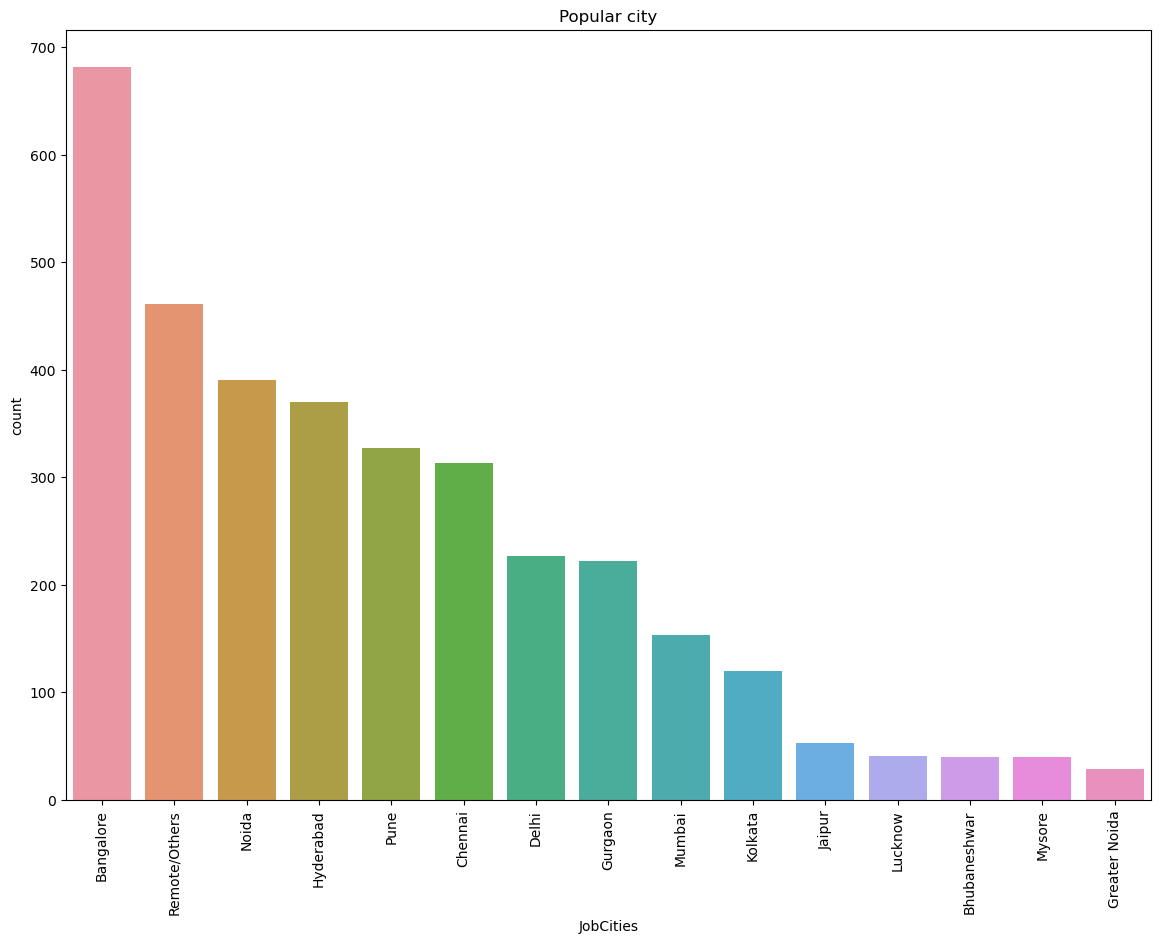

In [646]:
plt.figure(figsize=(14,10))
# Get the sorted order of cities based on their counts
city_order = df.loc[df['JobCities'].isin(popular_city), 'JobCities'].value_counts().index
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'], order=city_order)
plt.title("Popular city")
plt.xticks(rotation=90)
plt.show()

Bivariate analysis

Salary VS Gender

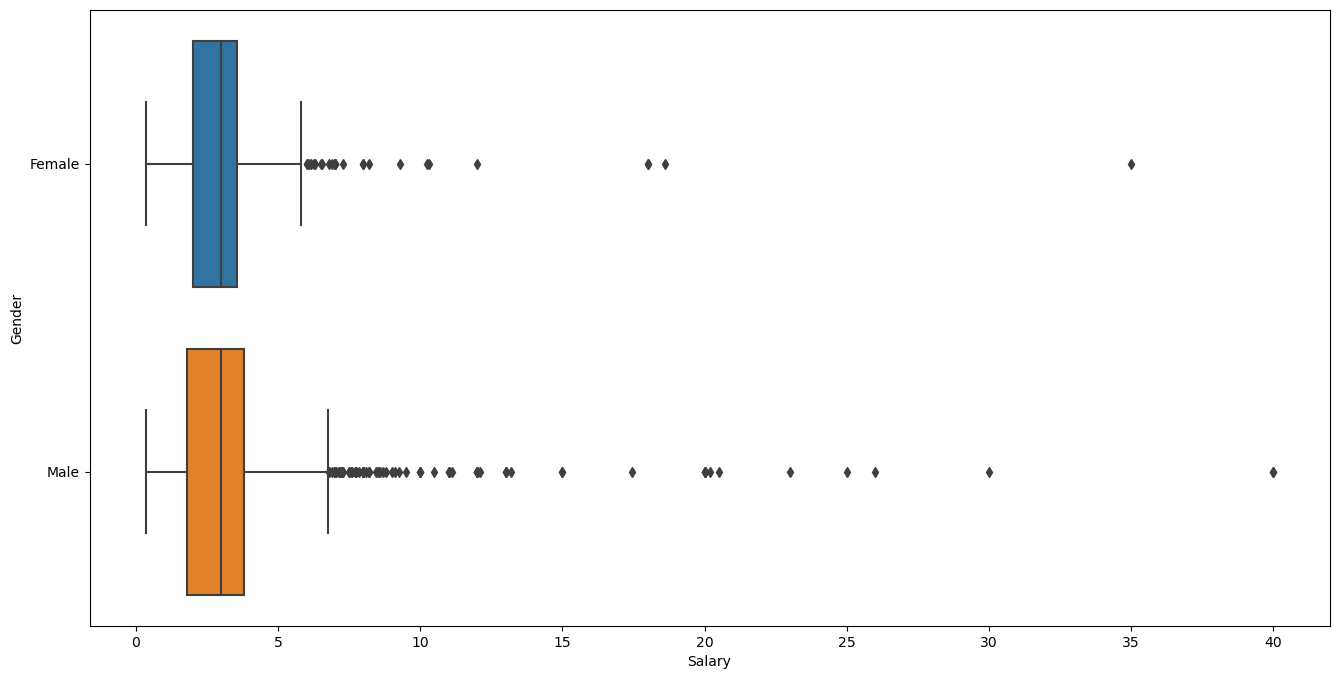

In [647]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Salary']/100000,y=df['Gender'])

plt.show()

The median salary of both Males and Females is almost similar.

The maximum salary of the males category exceeds the maximum salary of female category.

The Highest salary is more than 40LPA.

Designation VS Salary

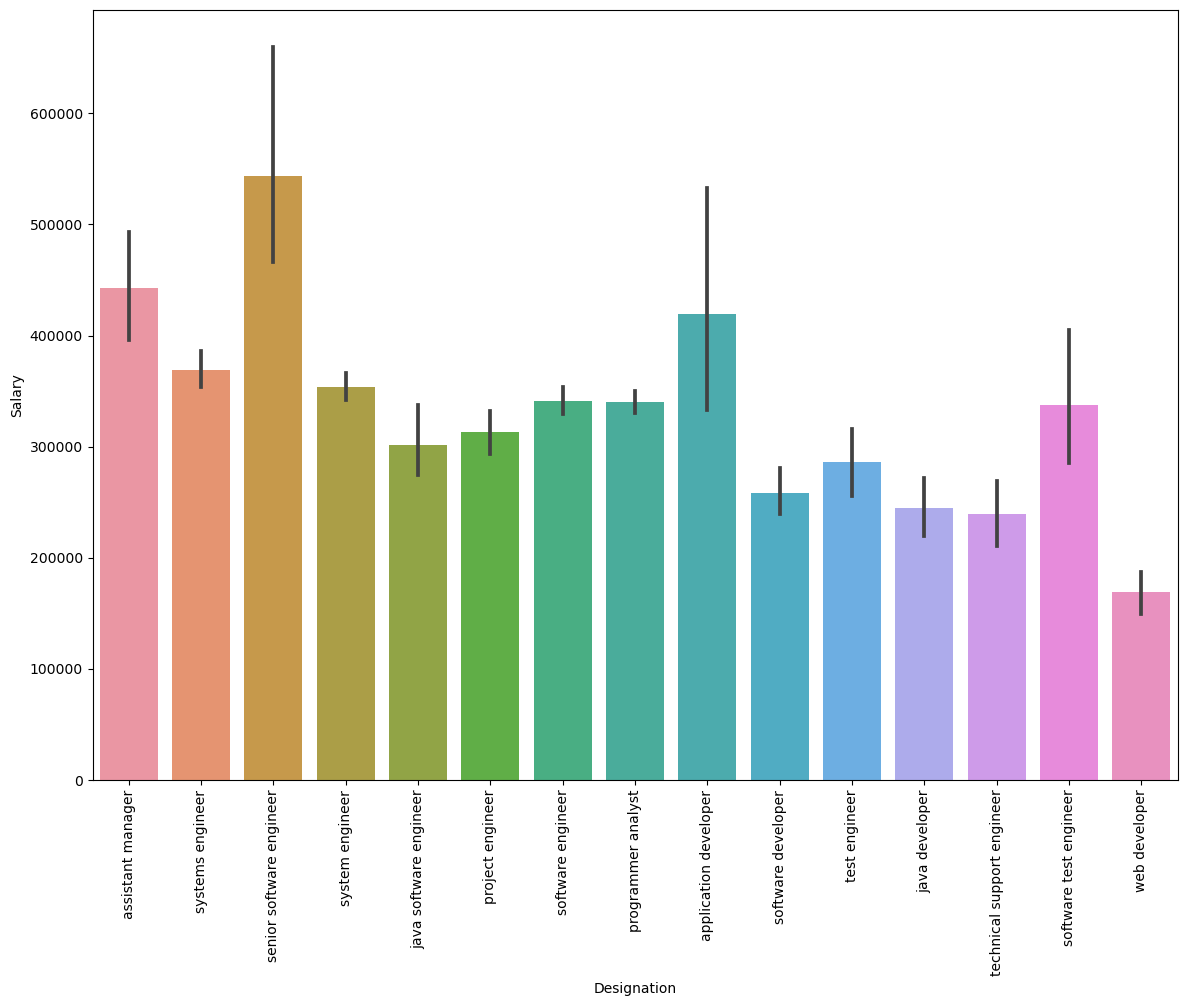

In [648]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],y=df['Salary'])
plt.xticks(rotation=90)
plt.show()

Specialization VS Salary

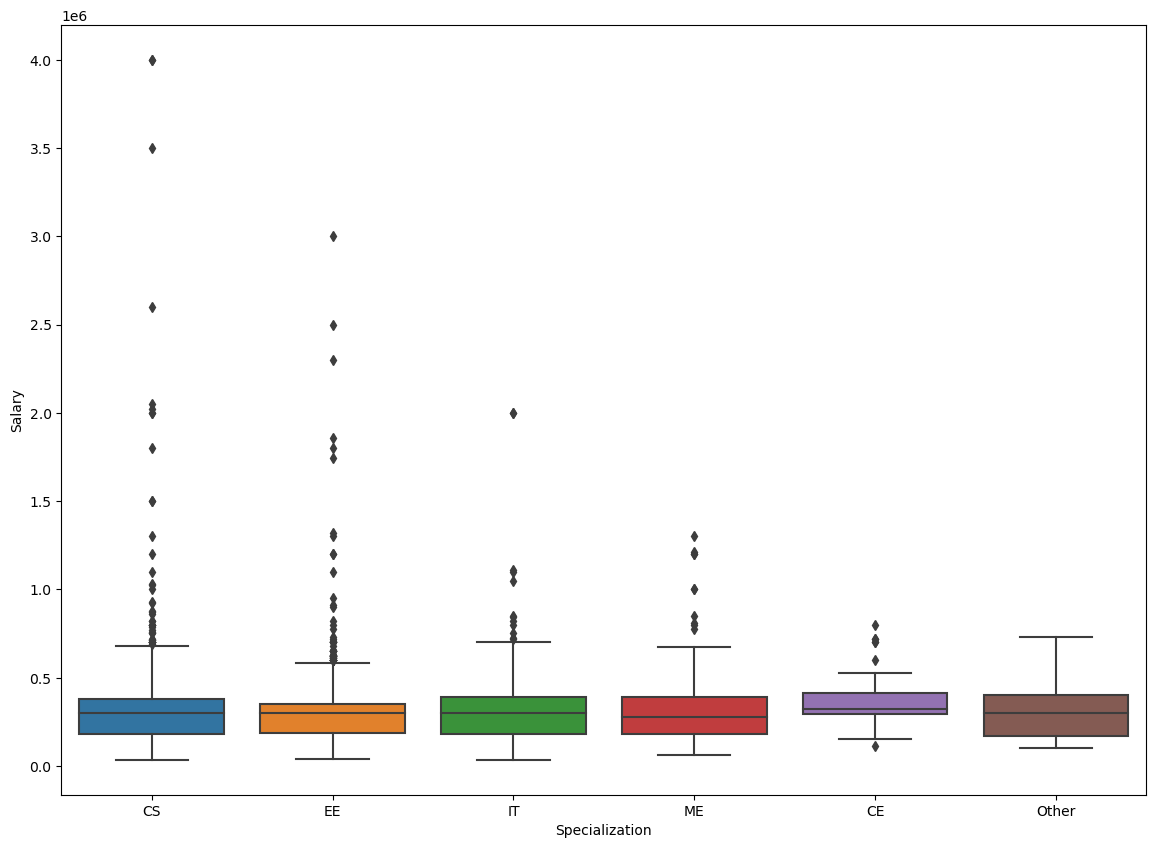

In [649]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['Specialization'],y=df['Salary'])
plt.show()

The median salary of all departments are almost similar.

The salary packages of CE specialization are low compared to CS, EE, IT and ME categories.

Salaries of CS and IT are almost same.

Specialization VS Gender

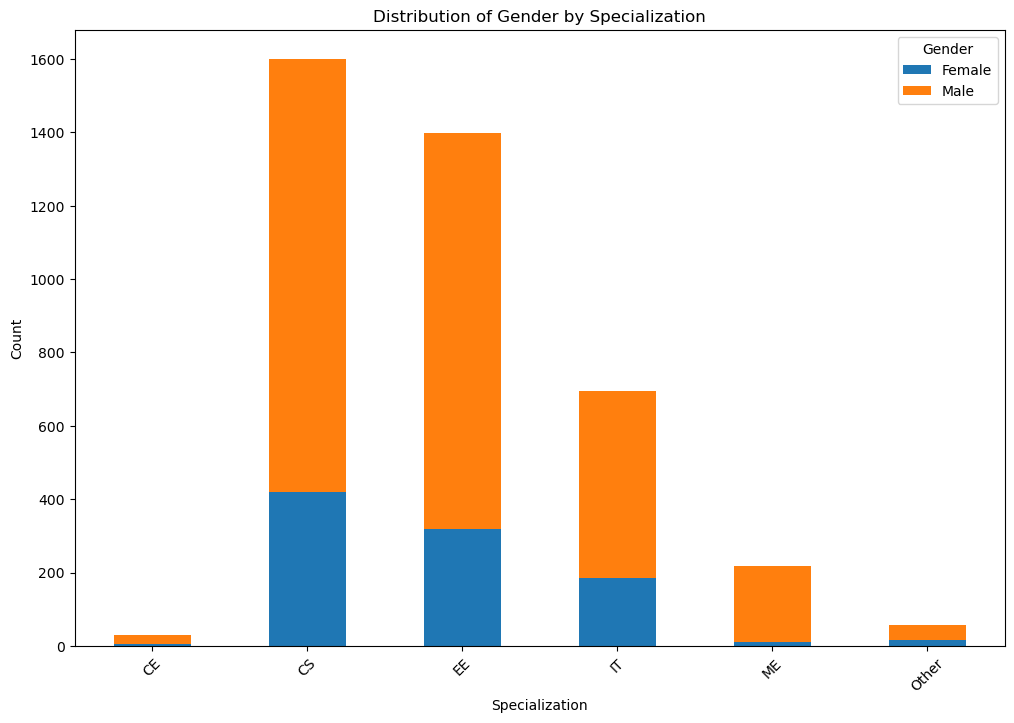

In [650]:
specialization_gender = df.groupby(['Specialization', 'Gender']).size().unstack()

# Plot the stacked bar chart
specialization_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Distribution of Gender by Specialization")
plt.ylabel("Count")
plt.xlabel("Specialization")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

The female aspirants are less than half of male aspirants in each specialization.

MultiVariate Analysis

Correlation Matrix

<Axes: >

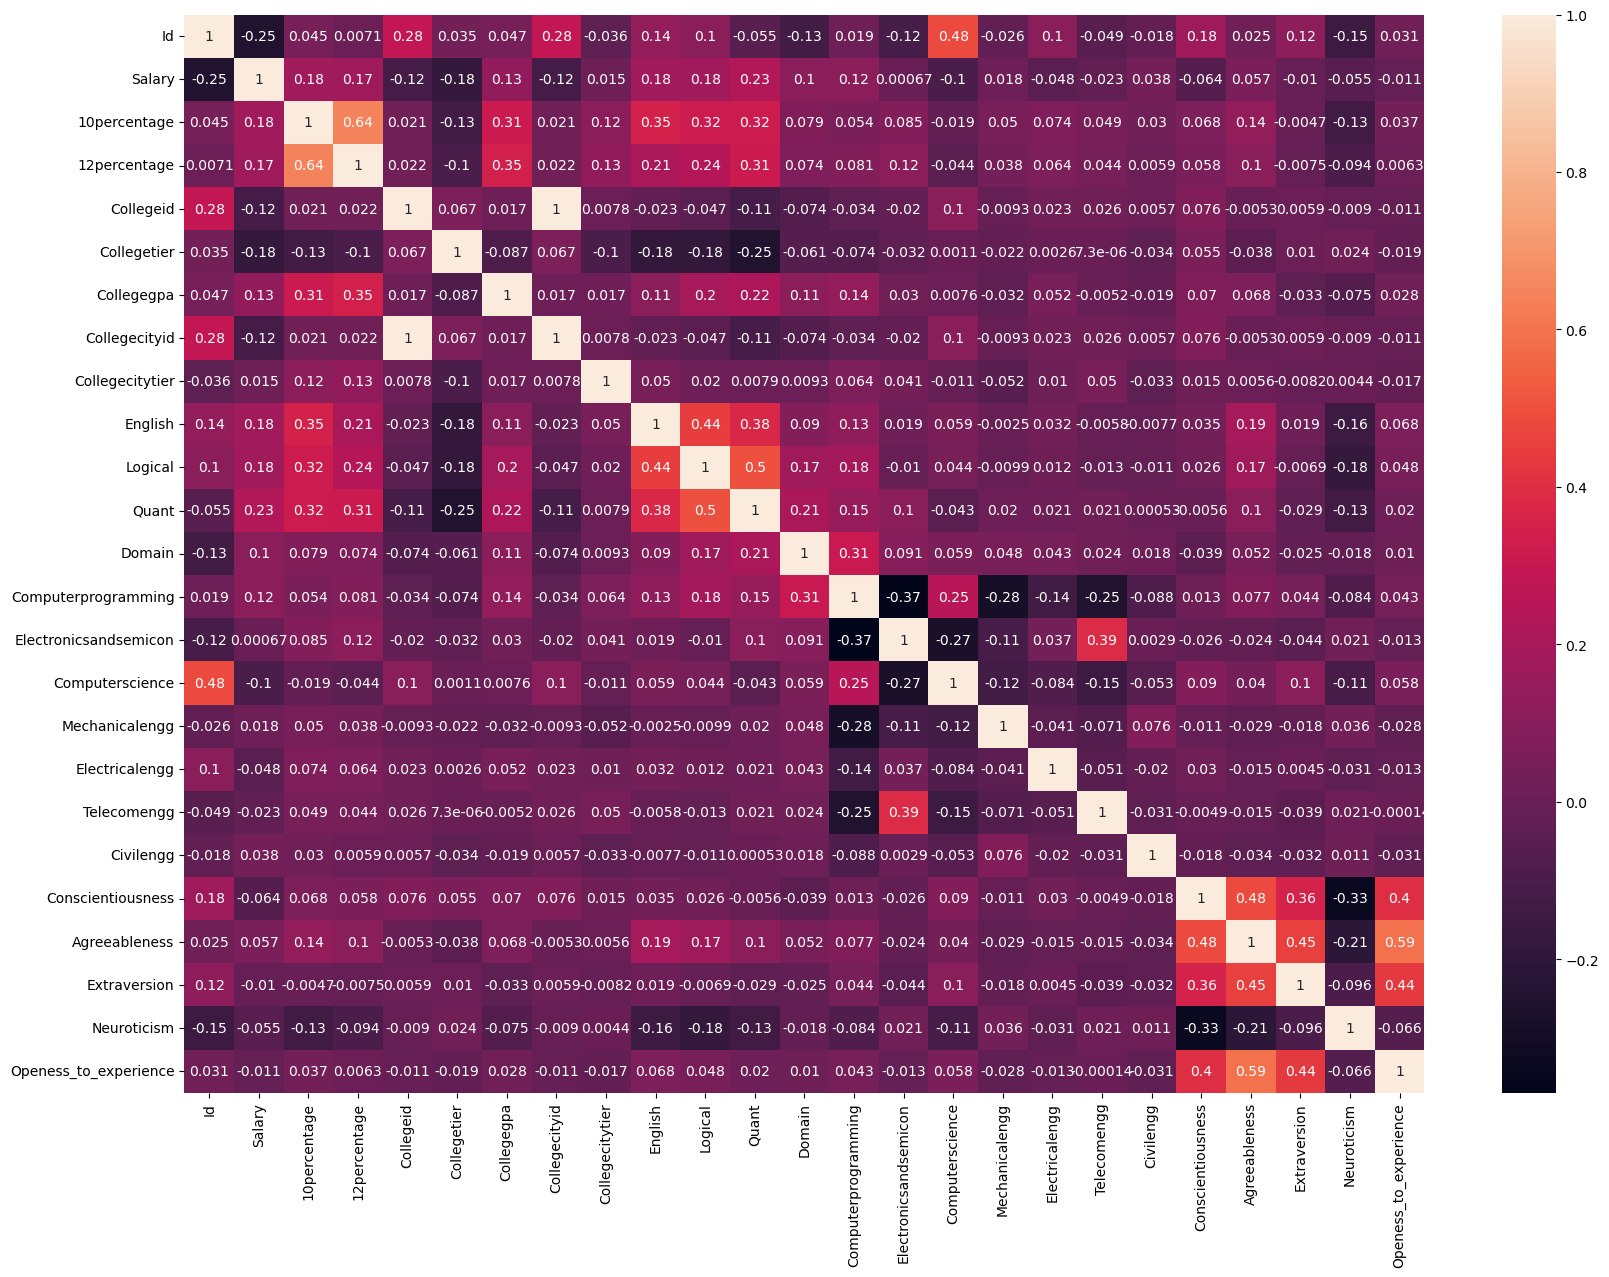

In [651]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(numeric_only = True),annot = True)

From the above heatmap,
There is a strong positive correlation between grade 10 and grade 12 variables, 
indicating that students who perform well in 10th grade tend to also perform well in 12th grade.

A positive correlation suggests that students who score well in 10th and 12th grade are likely to perform better in college.

Variables like Conscientiousness, Agreeableness, and Extraversion shows positive correlations with College GPA, 
indicating that certain personality traits may contribute to academic success.

The negative correlation between Neuroticism and College GPA suggests that higher levels of neuroticism (anxiety, emotional instability) may be associated with lower academic performance.

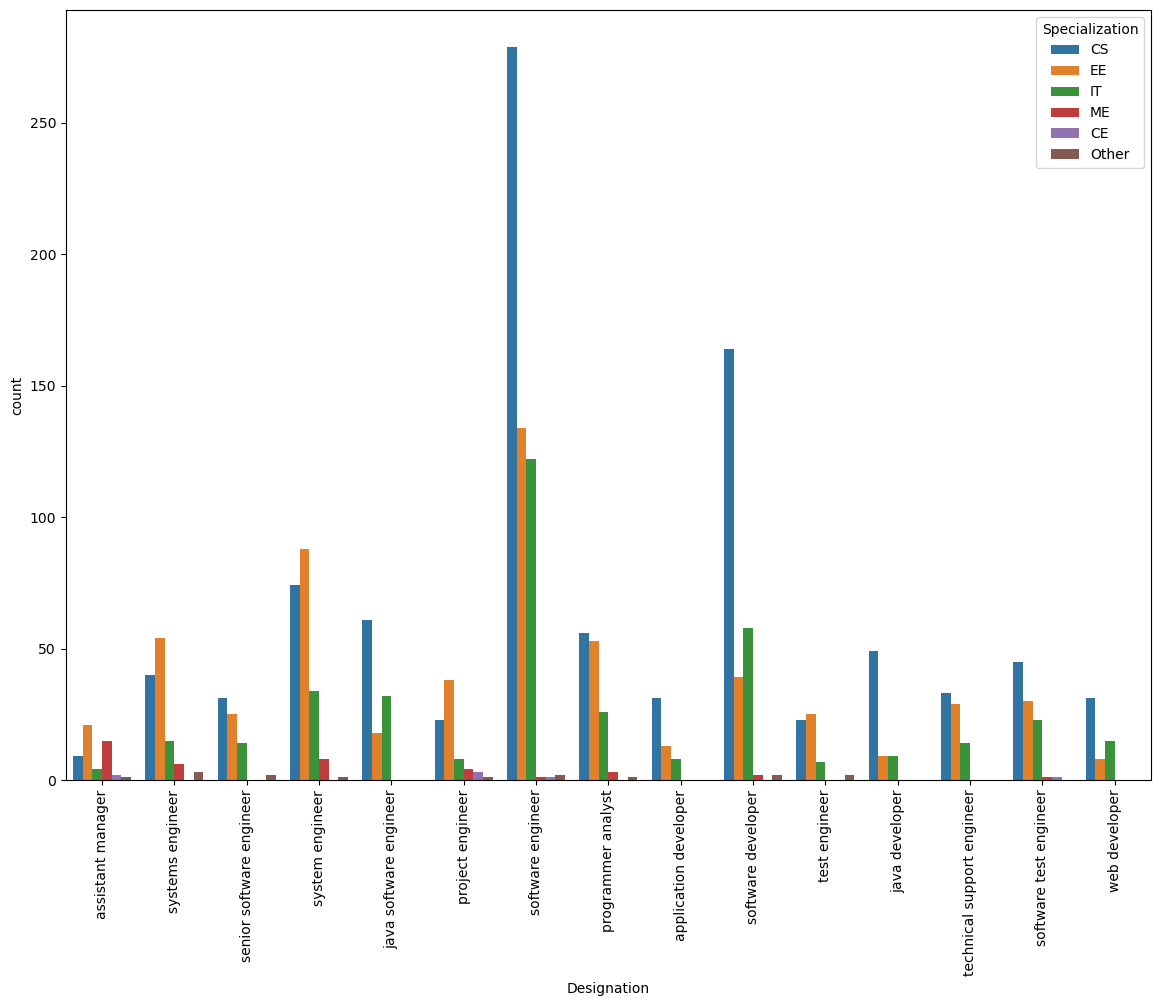

In [652]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

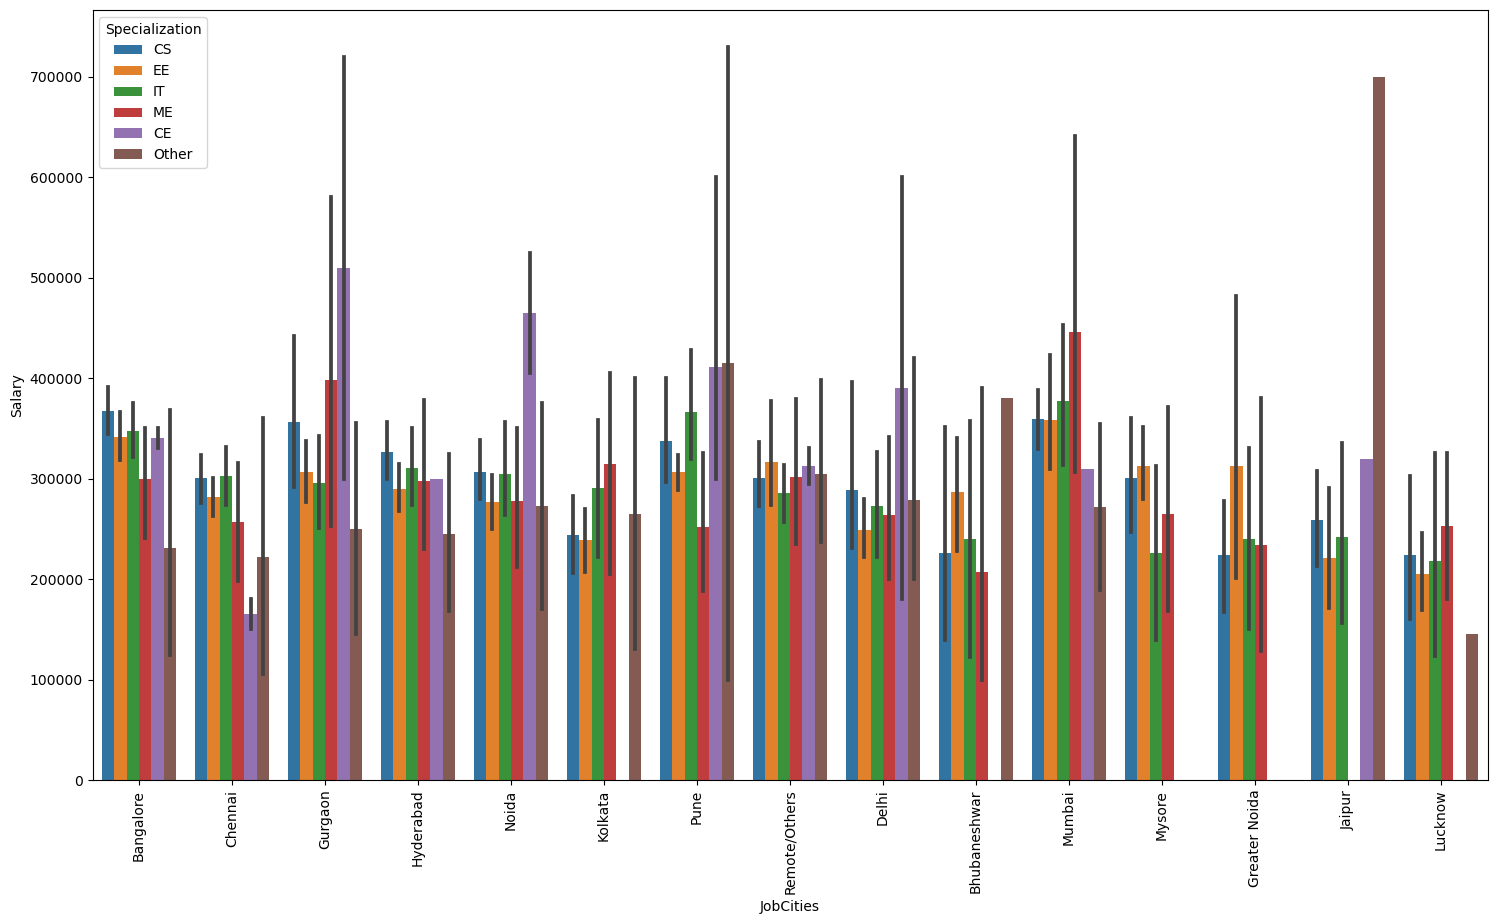

In [653]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

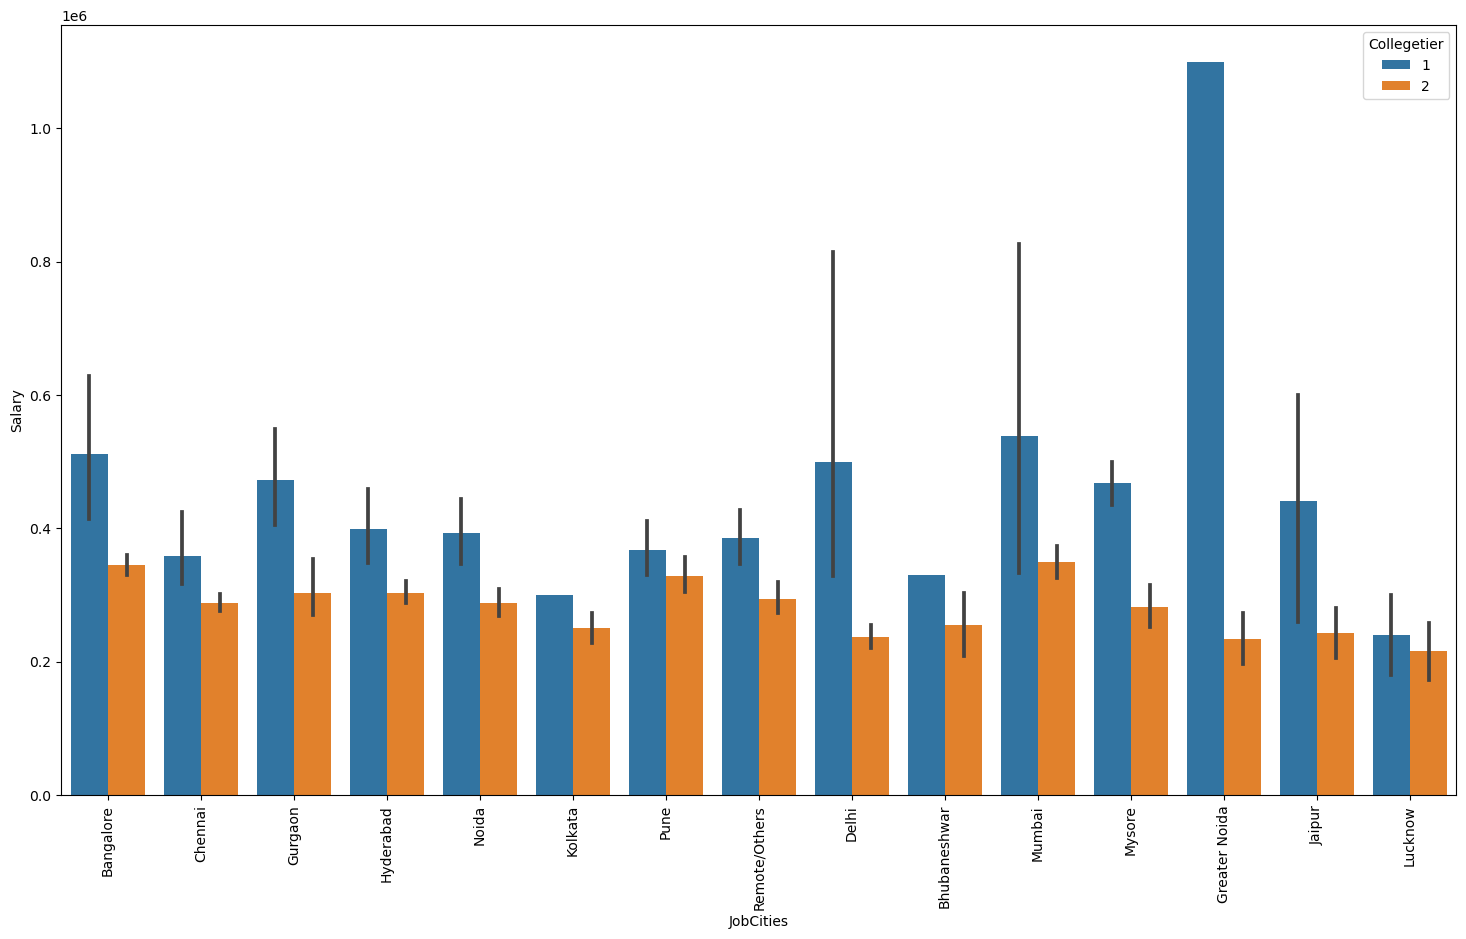

In [654]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Collegetier'])
plt.xticks(rotation=90)
plt.show()

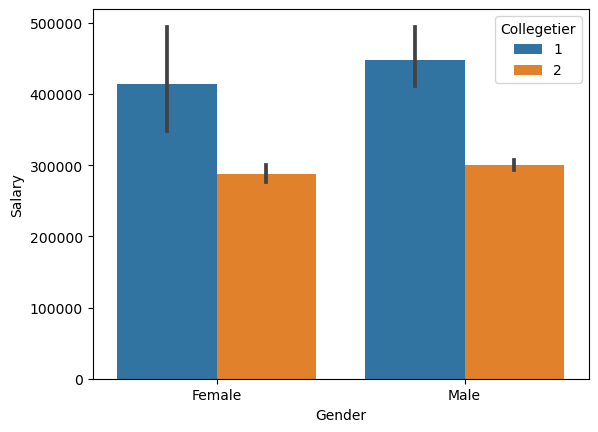

In [655]:
sns.barplot(x=df['Gender'],y=df['Salary'],hue=df['Collegetier'])
plt.show()

Tier 1 college students are getting more salary than Tier 2 college students

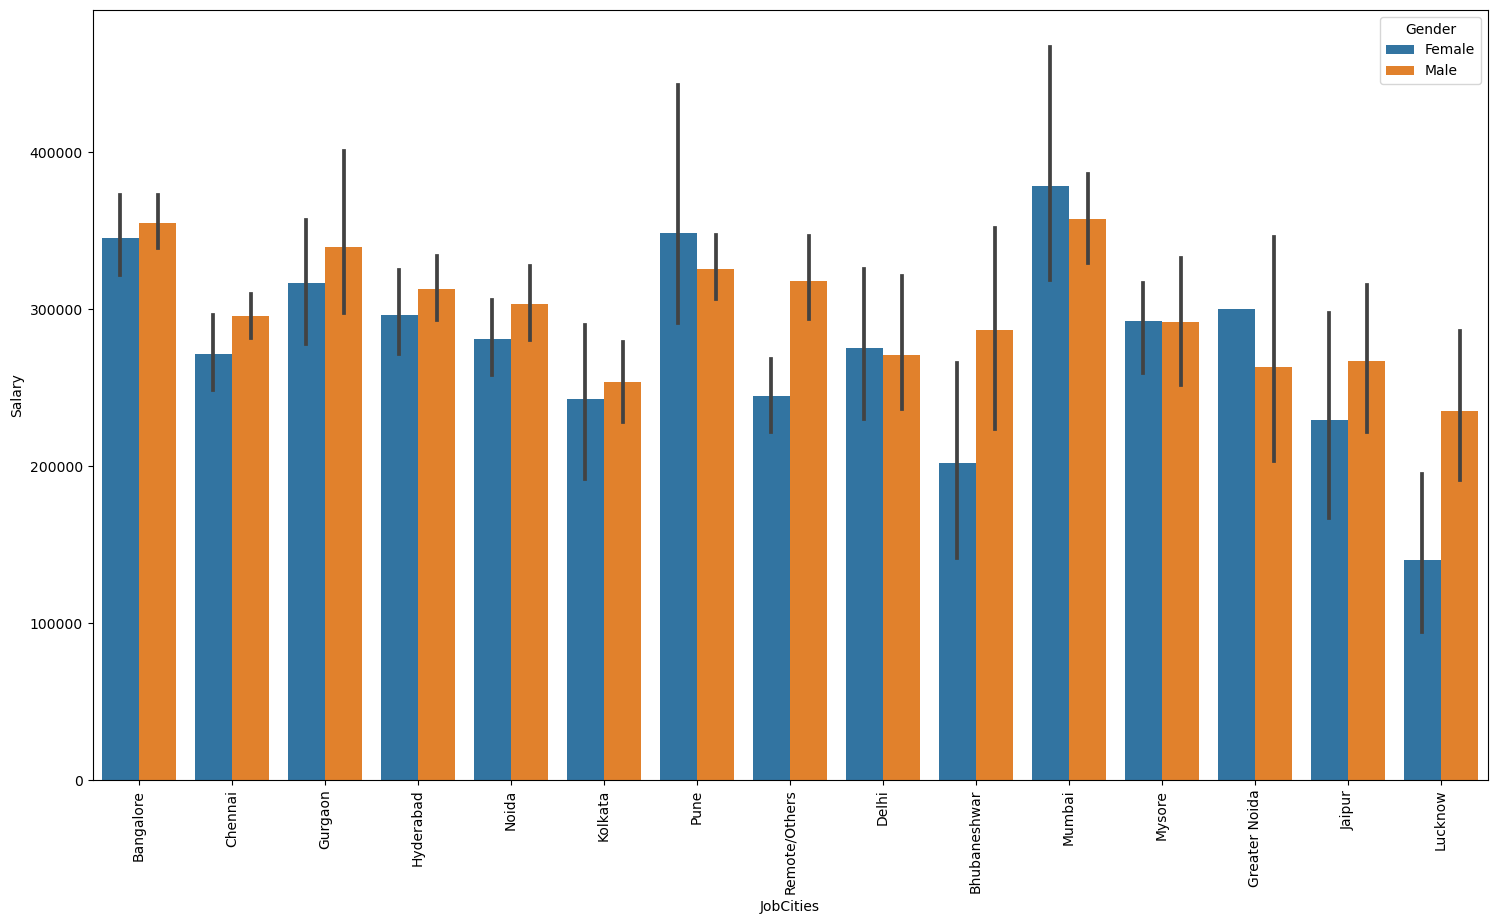

In [656]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

In Pune and Mumbai female candidates are offered more salary than the male candidates.

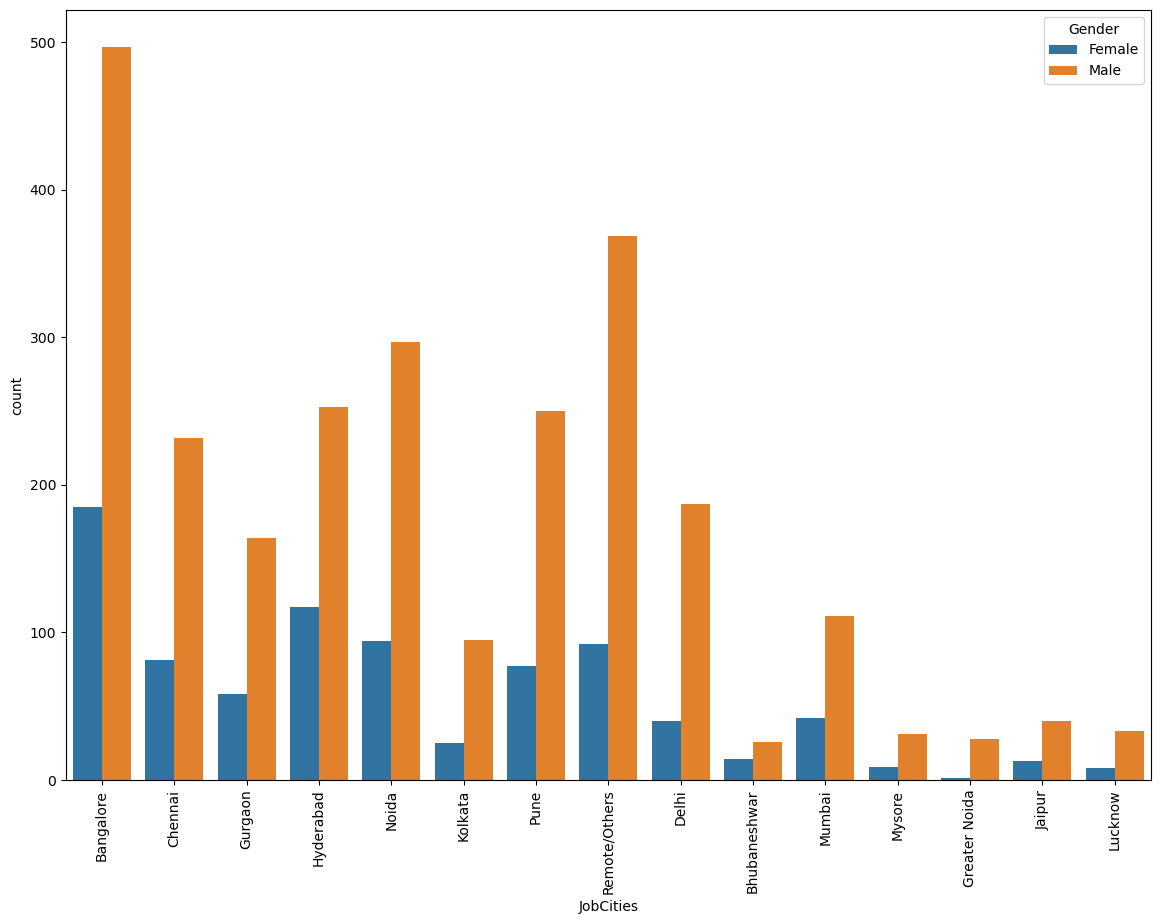

In [657]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

Research Questions

Claim-1 : Times of India article dated Jan 18, 2019 states that 
“After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, 
Software Engineer, Hardware Engineer and Associate Engineer 
you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [658]:
df['Dol'].replace(to_replace='present',value=pd.Timestamp.now(),inplace=True)

In [659]:
df['Tenure'] = (df['Dol']-df['Doj'])/np.timedelta64(1, 'M')
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'].unique()

array([148, 133, 124, 159,  11,   8, 135, 123,  48,  38, 130, 129, 134,
       121,  13,   4,  22,  16,  17,   7, 145,  32,   1,  -7, 154, 132,
       120, 117, 127, 139,  53,   9,   2, 122,  34,  20,  25, 116, 114,
       119, 151,  42, 131,   5,  24,   6,  18, 112, 125,   3, 155, 111,
       137,  -4,  44, 163, 136, 115,  10, 147,  41, 174,  15,  29,  14,
       144, 138, 126, 167,  23,  45,  -8,  27,  26, 140, 157,  21, 152,
        37,  43, 153, 146, 118,  30, 150,  12,  -3, 141,  36,  -2,   0,
        39, 128, 113,  33, 149,  57,  19, 166, 164, 142,  40,  -9, 158,
       165,  28, 143, 171, 170,  35, 161, 156,  50,  52, 169, 160, 172,
       162,  61,  31,  -5,  49,  58, 175, 107,  47,  55, 168, 225, 110,
        -6,  56, 106,  54,  72, 400,  46, 207])

In [660]:
#df[df['Tenure']<0]

In [661]:
claim_data = df[(df['Designation'].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df['Tenure']//12==0)]

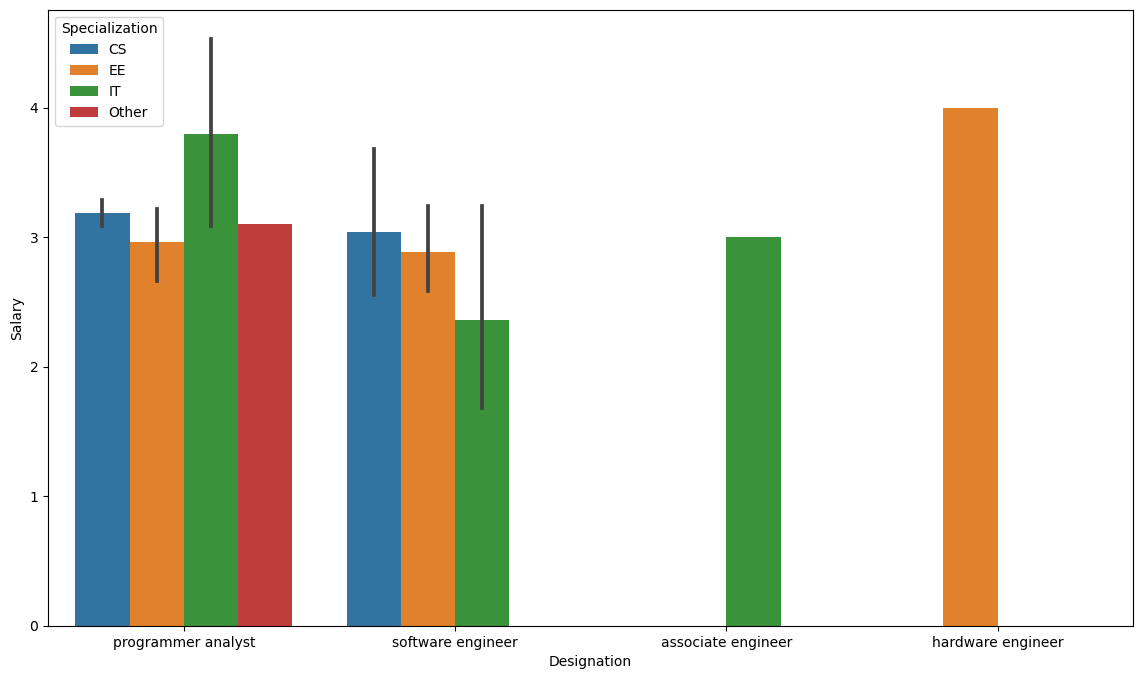

In [662]:
plt.figure(figsize=(14,8))
sns.barplot(x=claim_data['Designation'],y=claim_data['Salary']/100000,hue=claim_data['Specialization'])
plt.show()

In [663]:
# Step 1: Group the salaries by designations
group1 = claim_data['Salary'][claim_data['Designation'] == 'programmer analyst']
group2 = claim_data['Salary'][claim_data['Designation'] == 'software engineer']
group3 = claim_data['Salary'][claim_data['Designation'] == 'associate engineer']
group4 = claim_data['Salary'][claim_data['Designation'] == 'hardware engineer']

# Step 2: Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3, group4)

# Step 3: Output the results
print('ANOVA F-Statistic:', f_stat)
print('P-Value:', p_value)

# Step 4: Interpret the results (Typically, reject the null hypothesis if p-value < 0.05)
if p_value < 0.05:
    print("\nThere is a significant difference in Salary among the designations.")
else:
    print("\nNo significant difference in Salary among the designations.")

ANOVA F-Statistic: 0.3961182733079398
P-Value: 0.7560320329849151

No significant difference in Salary among the designations.


In [664]:
# Build the model without interaction term
model = ols('Salary ~ Designation + Specialization', data=claim_data).fit()

# Perform ANOVA without interaction
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq     df         F    PR(>F)
Designation     4.163065e+10    3.0  0.485788  0.692829
Specialization  3.369809e+10    3.0  0.393223  0.758112
Residual        3.227928e+12  113.0       NaN       NaN


The above made claim is true irrespective of the specialization.

Designation and Specialization does not have statistically significant effect on salary.

Claim-2: Tier-1 college students tend to get higher salary packages compared to Tier-2 College students.

<Axes: xlabel='Collegetier', ylabel='Salary'>

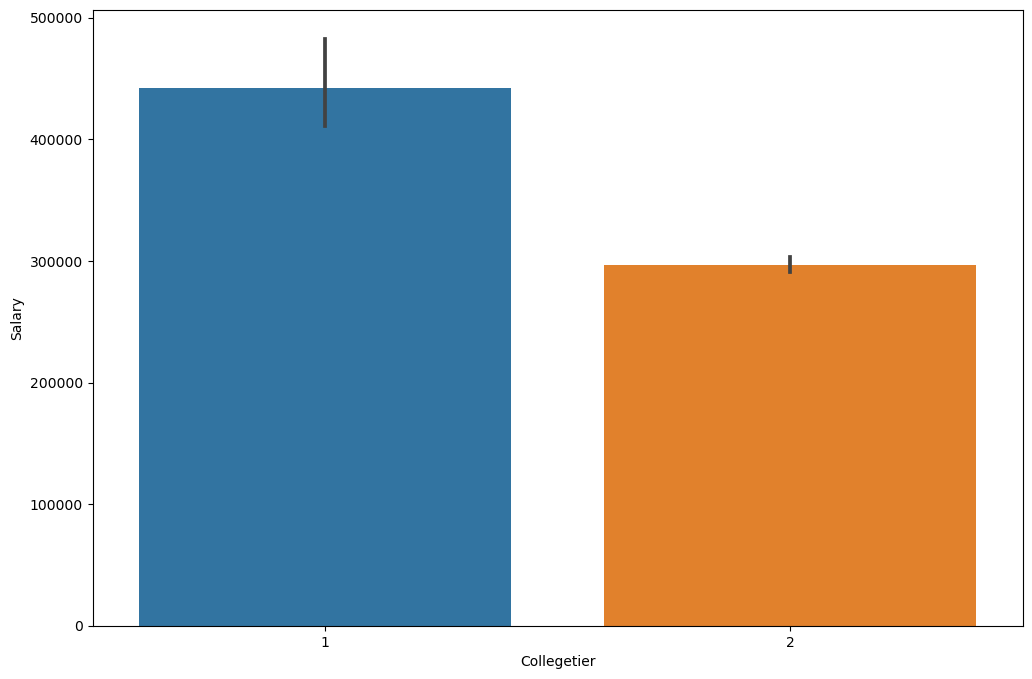

In [665]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Collegetier'],y=df['Salary'])

In [666]:
tier1 = df.loc[df['Collegetier']== 1,'Salary']
tier2 = df.loc[df['Collegetier']== 2,'Salary']


t_statistic, p = stats.ttest_ind(tier1, tier2)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in the average salary between Tier 1 and Tier 2 college students.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average salary between Tier 1 and Tier 2 college students.")

p-value: 3.0182471444274503e-30
Reject the null hypothesis. There is a statistically significant difference in the average salary between Tier 1 and Tier 2 college students.


Claim-3:Is there a relationship between gender and specialization?

<Axes: xlabel='Specialization', ylabel='count'>

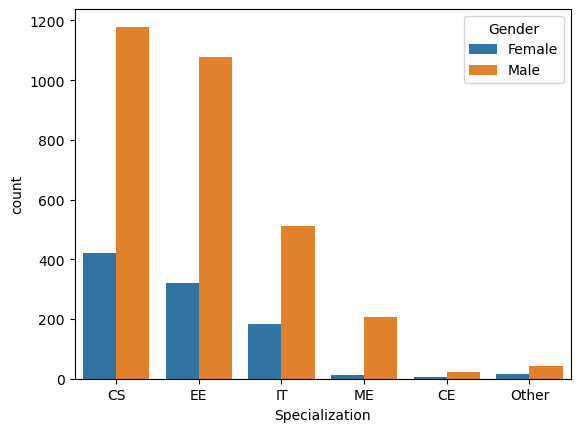

In [667]:
sns.countplot(x=df['Specialization'],hue=df['Gender'])

In [668]:
# Step 1: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

print("Contingency Table:\n", contingency_table)

# Step 2: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 4: Interpret the results (Typically, you reject the null hypothesis if p-value < 0.05)
if p < 0.05:
    print("\nThere is a significant relationship between 'Gender' and 'Specialization'.")
else:
    print("\nNo significant relationship between 'Gender' and 'Specialization'.")

Contingency Table:
 Specialization  CE    CS    EE   IT   ME  Other
Gender                                         
Female           6   420   320  184   12     15
Male            23  1179  1079  511  207     42

Chi-Square Statistic: 49.415941726117246
P-Value: 1.8246242604380306e-09
Degrees of Freedom: 5
Expected Frequencies:
 [[   6.94172086  382.75212606  334.87818909  166.36193097   52.42196098
    13.64407204]
 [  22.05827914 1216.24787394 1064.12181091  528.63806903  166.57803902
    43.35592796]]

There is a significant relationship between 'Gender' and 'Specialization'.


Most females prefer CS, EE and IT specializations.

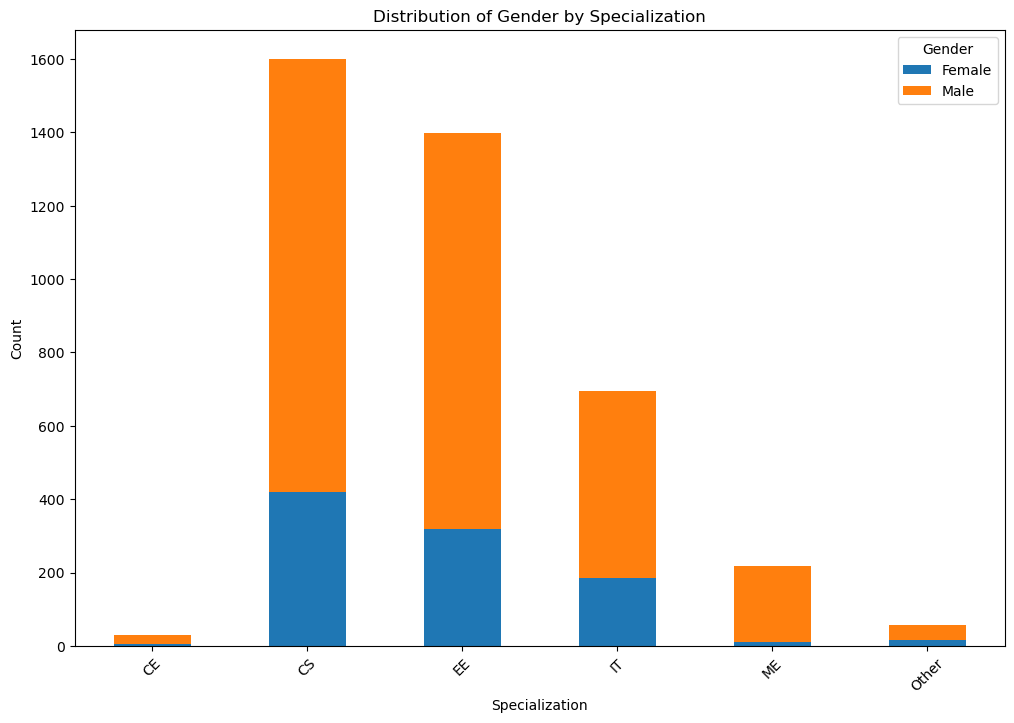

In [669]:
specialization_gender = df.groupby(['Specialization', 'Gender']).size().unstack()

# Plot the stacked bar chart
specialization_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Distribution of Gender by Specialization")
plt.ylabel("Count")
plt.xlabel("Specialization")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Claim-4: "On average, women in software engineering roles earn less than their male counterparts"

In [670]:
male_gen = df.loc[df['Gender']=='Male','Salary']
female_gen = df.loc[df['Gender']=='Female','Salary']


male_gen
t_statistic, p = stats.ttest_ind(male_gen, female_gen)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in the average salary between male and female.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average salary between male and female.")

p-value: 0.03332394177012777
Reject the null hypothesis. There is a statistically significant difference in the average salary between male and female.


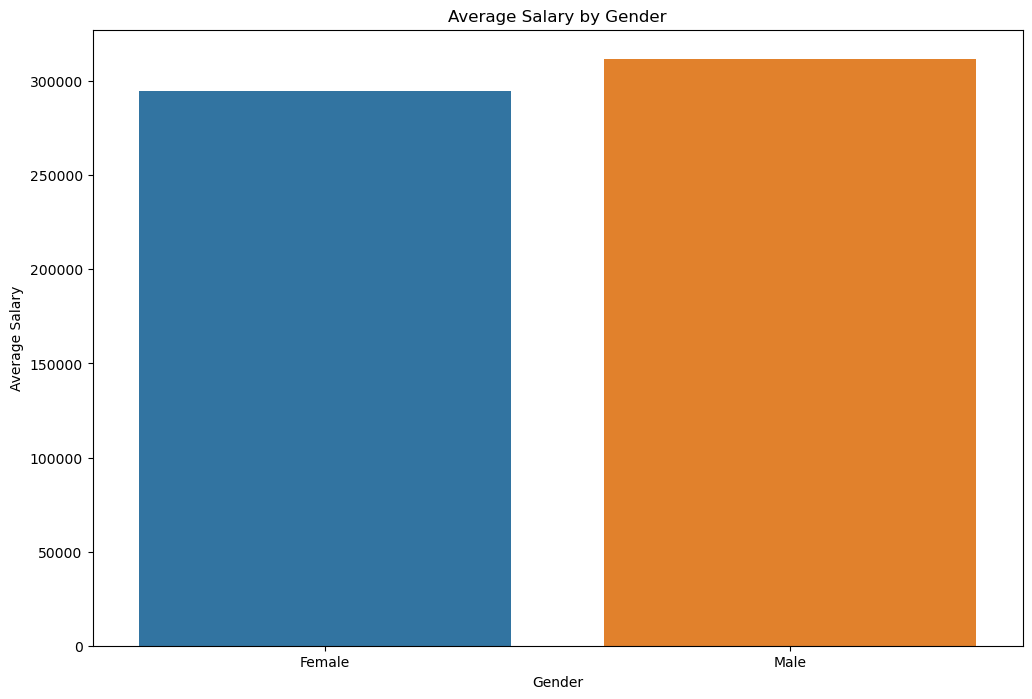

In [671]:
# Step 1: Group the data to calculate the mean salary by gender
avg_sal = df.groupby('Gender')['Salary'].mean()

# Step 2: Convert the resulting Series to a DataFrame for Seaborn
avg_sal_df = avg_sal.reset_index()

# Step 3: Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Salary', data=avg_sal_df)

plt.title("Average Salary by Gender")
plt.ylabel("Average Salary")
plt.show()

Claim-5: According to U.S Bureau of Labor Statistics 
    "Learn more, earn more: Education leads to higher wages, lower unemployment"

In [672]:
df['Grad_level'] = ['UnderGrad' if x == 'B.Tech/B.E.' else 'PostGrad' for x in df['Degree']]

df['Grad_level'].unique()

array(['UnderGrad', 'PostGrad'], dtype=object)

<Axes: xlabel='Grad_level', ylabel='Salary'>

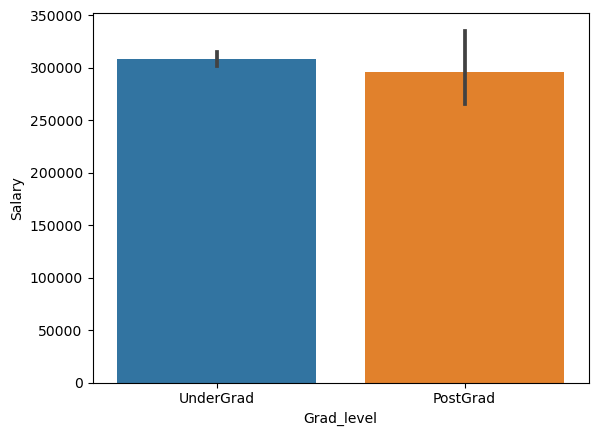

In [673]:
sns.barplot(x=df['Grad_level'],y=df['Salary'])

In [674]:
undergrad_sal = df.loc[df['Grad_level']=='UnderGrad','Salary']
postgrad_sal = df.loc[df['Grad_level']=='PostGrad','Salary']


t_statistic, p = stats.ttest_ind(undergrad_sal, postgrad_sal)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in the average salary between undergraduates and postgraduates.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average salary between undergraduates and postgraduates.")

p-value: 0.33385580824584704
Fail to reject the null hypothesis. There is no statistically significant difference in the average salary between undergraduates and postgraduates.


In [675]:
print(df['Salary'].groupby(df['Grad_level']).mean())

Grad_level
PostGrad     296241.610738
UnderGrad    308622.702703
Name: Salary, dtype: float64


Tha claim that post graduates earn more than under graduates is not true.

It depends on several conditions like market demand, field of study, previous experience etc.,

Conclusion

The analysis reveals distinct patterns among job aspirants from different gender and educational backgrounds.

The majority of male aspirants hail from Computer Science (CS) and Electrical Engineering (EE) departments, particularly from Tier-1 colleges. They predominantly pursue careers in the IT domain, primarily in Mumbai and Bangalore, with an average salary of 3 LPA and a maximum salary reaching 40 LPA.

Female aspirants tend to favor CS, EE, and IT departments over traditional engineering fields like Mechanical and Civil. They also seek employment in the IT sector, primarily in Mumbai and Pune, earning an average salary of 2.9 LPA and a maximum around 36-37 LPA.

While Bangalore remains the most desired city for employment, many students from Tier-1 colleges are opting to work in Greater Noida instead.

The analysis highlights that Software Engineer and Software Developer positions are the most common among aspirants. In contrast, Senior Software Engineer and Assistant Manager roles offer the highest salary packages, indicating a lucrative career progression for those advancing in their respective fields.

Overall, the findings underscore the significance of college tier and specialization in shaping career opportunities and salary prospects, particularly in the dynamic IT landscape.